<a href="https://colab.research.google.com/github/bhartikajal/-C-Users-KAJAL-OneDrive-Desktop-landing-page-project/blob/master/spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import IFrame
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
main_df = pd.read_csv("/content/data (1).csv")
main_df.head()


,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,['Carl Woitschach'],158648,1928,1928,0.995,0.708,0.1950,0.563,0.1510,-12.428,0.0506,118.469,0.7790,1.0,10.0,0.0,0.0
1,6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",282133,1928,1928,0.994,0.379,0.0135,0.901,0.0763,-28.454,0.0462,83.972,0.0767,1.0,8.0,0.0,0.0
2,6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],104300,1928,1928,0.604,0.749,0.2200,0.000,0.1190,-19.924,0.9290,107.177,0.8800,0.0,5.0,0.0,0.0
3,6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],180760,9/25/28,1928,0.995,0.781,0.1300,0.887,0.1110,-14.734,0.0926,108.003,0.7200,0.0,1.0,0.0,0.0
4,6N6tiFZ9vLTSOIxkj8qKrd,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",687733,1928,1928,0.990,0.210,0.2040,0.908,0.0980,-16.829,0.0424,62.149,0.0693,1.0,11.0,1.0,0.0


In [3]:
main_df.drop(["id", "release_date", "liveness"], axis=1, inplace=True)
main_df.head()

,name,artists,duration_ms,year,acousticness,danceability,energy,instrumentalness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,Singende Bataillone 1. Teil,['Carl Woitschach'],158648,1928,0.995,0.708,0.1950,0.563,-12.428,0.0506,118.469,0.7790,1.0,10.0,0.0,0.0
1,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",282133,1928,0.994,0.379,0.0135,0.901,-28.454,0.0462,83.972,0.0767,1.0,8.0,0.0,0.0
2,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],104300,1928,0.604,0.749,0.2200,0.000,-19.924,0.9290,107.177,0.8800,0.0,5.0,0.0,0.0
3,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],180760,1928,0.995,0.781,0.1300,0.887,-14.734,0.0926,108.003,0.7200,0.0,1.0,0.0,0.0
4,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",687733,1928,0.990,0.210,0.2040,0.908,-16.829,0.0424,62.149,0.0693,1.0,11.0,1.0,0.0


In [4]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39090 entries, 0 to 39089
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              39090 non-null  object 
 1   artists           39090 non-null  object 
 2   duration_ms       39090 non-null  int64  
 3   year              39090 non-null  int64  
 4   acousticness      39090 non-null  float64
 5   danceability      39090 non-null  float64
 6   energy            39090 non-null  float64
 7   instrumentalness  39090 non-null  float64
 8   loudness          39090 non-null  float64
 9   speechiness       39089 non-null  float64
 10  tempo             39089 non-null  float64
 11  valence           39089 non-null  float64
 12  mode              39089 non-null  float64
 13  key               39089 non-null  float64
 14  popularity        39089 non-null  float64
 15  explicit          39089 non-null  float64
dtypes: float64(12), int64(2), object(2)
memo

In [5]:
print(main_df["mode"].unique()) # Should be either 0 or 1
print(main_df["key"].unique()) # Should be values from 0 to 11
print(main_df["explicit"].unique()) # Should be either 0 or 1

[ 1.  0. nan]
[10.  8.  5.  1. 11.  6.  9.  7.  4.  2.  3.  0. nan]
[ 0.  1. nan]


In [6]:
print(str(main_df["year"].min()) + " – " + str(main_df["year"].max())) # Range: [1921 – 2020]
print(str(main_df["acousticness"].min()) + " – " + str(main_df["acousticness"].max())) # Range: [0.0 – 1.0]
print(str(main_df["danceability"].min()) + " – " + str(main_df["danceability"].max())) # Range: [0.0 – 1.0]
print(str(main_df["energy"].min()) + " – " + str(main_df["energy"].max())) # Range: [0.0 – 1.0]
print(str(main_df["instrumentalness"].min()) + " – " + str(main_df["instrumentalness"].max())) # Range: [0.0 – 1.0]
print(str(main_df["speechiness"].min()) + " – " + str(main_df["speechiness"].max())) # Range: [0.0 – 1.0]
print(str(main_df["valence"].min()) + " – " + str(main_df["valence"].max())) # Range: [0.0 – 1.0]
print(str(main_df["popularity"].min()) + " – " + str(main_df["popularity"].max())) # Range: [0 – 100]

1928 – 2020
0.0 – 0.996
0.0 – 0.977
2.01e-05 – 1.0
0.0 – 1.0
0.0 – 0.968
0.0 – 0.998
0.0 – 81.0


In [7]:
main_df[main_df.duplicated()]

,name,artists,duration_ms,year,acousticness,danceability,energy,instrumentalness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
609,"Rhapsody on a Theme of Paganini, Op.43: Variat...","['Sergei Rachmaninoff', 'William Kapell', 'Fri...",61467,1945,0.983000,0.635,0.012300,0.955000,-27.297,0.0521,83.046,0.6100,1.0,0.0,0.0,0.0
652,Interview with William Kapell,['William Kapell'],1325093,1945,0.913000,0.704,0.223000,0.000000,-24.480,0.9350,112.485,0.4030,0.0,2.0,0.0,0.0
3344,Give Me Your Love (Love Song),['Curtis Mayfield'],260333,1972,0.128000,0.591,0.637000,0.019500,-9.102,0.0887,172.452,0.9620,0.0,5.0,26.0,0.0
8094,Enamórate De Alguien Más,['Morat'],230040,2020,0.460000,0.591,0.659000,0.000000,-5.464,0.0332,145.997,0.6220,1.0,11.0,2.0,0.0
8169,"Danse macabre, S. 555 (after Camille Saint-Saens)","['Franz Liszt', 'Vladimir Horowitz']",491333,1928,0.993000,0.303,0.226000,0.826000,-21.483,0.0444,67.013,0.1460,1.0,3.0,0.0,0.0
8178,"Humoreske, Op. 20: Einfach","['Robert Schumann', 'Vladimir Horowitz']",118093,1928,0.995000,0.319,0.002170,0.937000,-36.905,0.0412,78.505,0.2290,1.0,10.0,0.0,0.0
8185,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",785427,1928,0.992000,0.301,0.082300,0.852000,-23.282,0.0382,137.296,0.0548,1.0,1.0,0.0,0.0
8196,"Sonata quasi Concerto, Op. 33, No. 3 in C: II....","['Muzio Clementi', 'Vladimir Horowitz']",351000,1928,0.989000,0.222,0.011300,0.954000,-33.218,0.0430,74.040,0.0917,1.0,5.0,0.0,0.0
8221,"Piano Sonata No. 2 in B-Flat Minor, Op. 36: I....","['Sergei Rachmaninoff', 'Vladimir Horowitz']",590293,1928,0.994000,0.376,0.071900,0.883000,-21.849,0.0352,141.390,0.0393,0.0,10.0,0.0,0.0
8664,"3 Romanzen, Op. 28: 2. Einfach","['Robert Schumann', 'William Kapell']",208640,1945,0.992000,0.286,0.023100,0.919000,-25.210,0.0329,75.078,0.0931,1.0,6.0,0.0,0.0


In [8]:
main_df.drop_duplicates(inplace=True)
main_df[main_df.duplicated()]

,name,artists,duration_ms,year,acousticness,danceability,energy,instrumentalness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit


In [15]:
IFrame(src="/content/spotify_eda.html", width=900, height=500)

In [16]:
plt.figure(figsize=(12, 6))
sns.heatmap(main_df.corr(), vmin=-1, vmax=1, annot=True, cmap="Greens")

ValueError: could not convert string to float: 'Singende Bataillone 1. Teil'

<Figure size 1200x600 with 0 Axes>

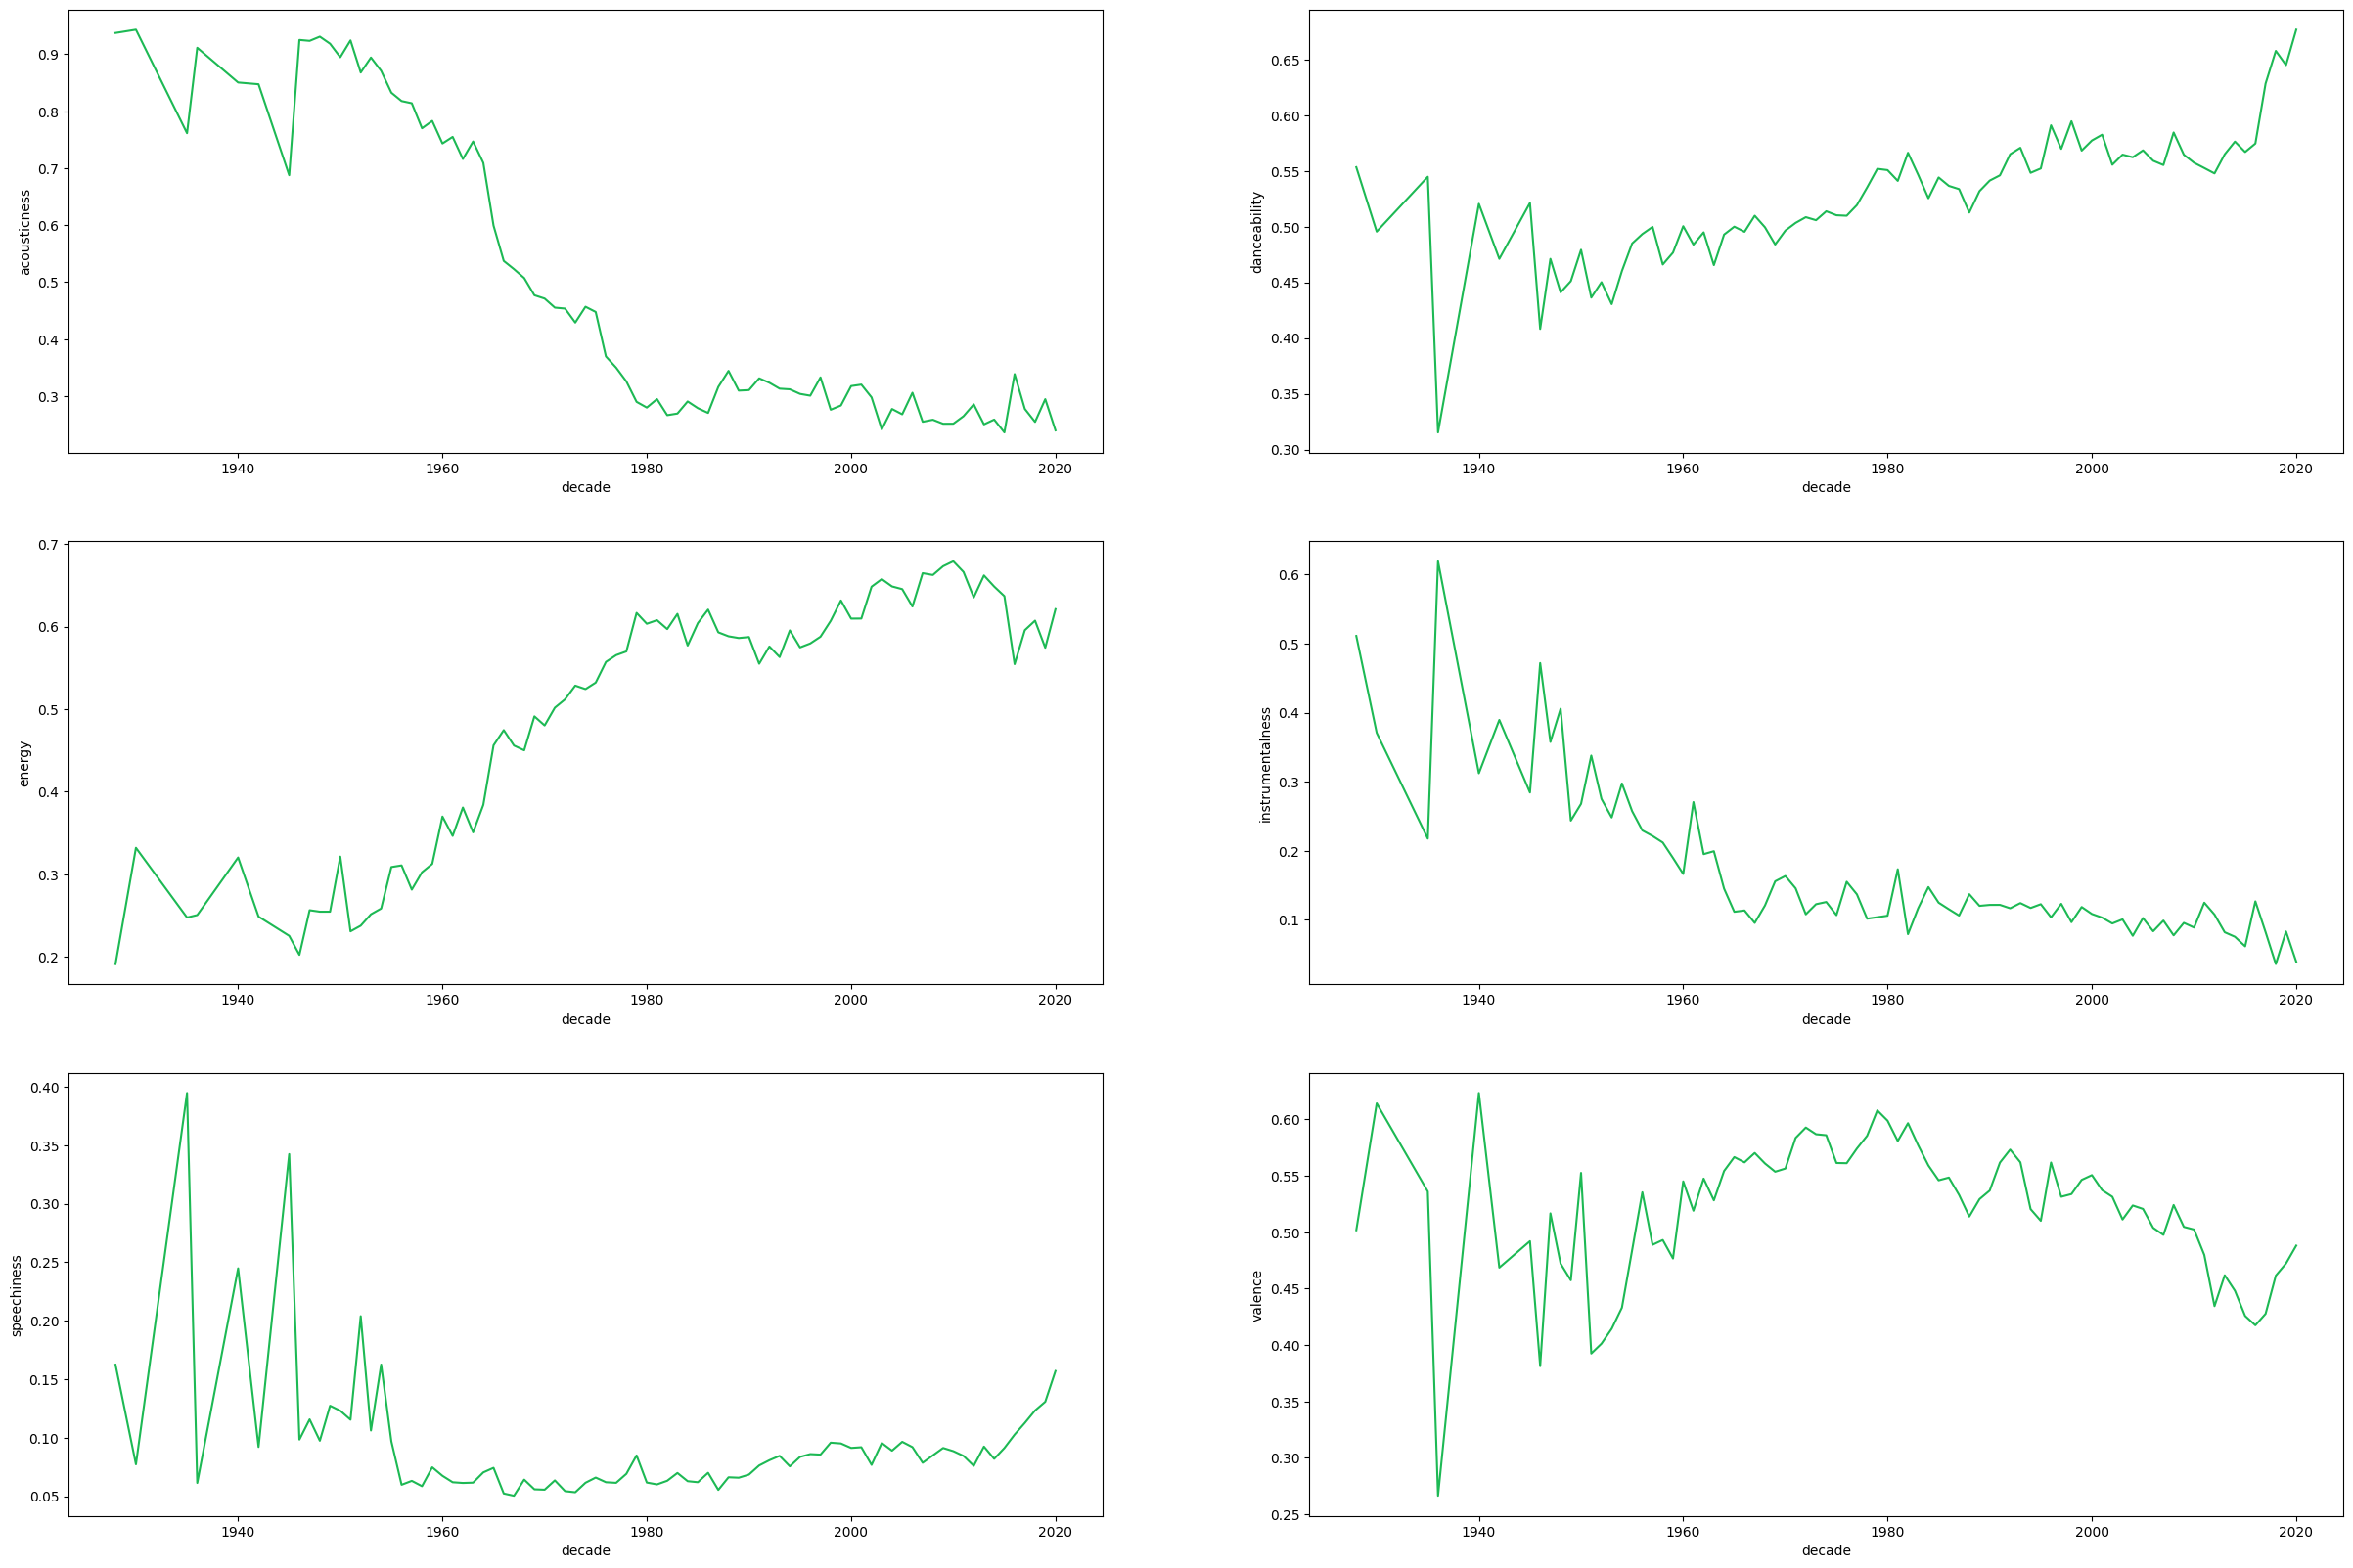

In [14]:
sp1, elements = plt.subplots(3, 2) # Initiate the subplots

arrElements = ["acousticness", "danceability", "energy", "instrumentalness", "speechiness", "valence"]
row = 0
col = 0

for elem in arrElements: # Produce a line graph for each musical element
    main_df.groupby("year")[elem].mean().plot(ax=elements[row][col], figsize=(30,20), color="#1db954") # Group rows by year and get the mean values for that particular element
    elements[row][col].set_xlabel("decade")
    elements[row][col].set_ylabel(elem)
    if col == 0:
        col = 1
    elif row == 0 and col == 1:
        row = 1
        col = 0
    elif row == 1 and col == 1:
        row = 2
        col = 0

Text(0.5, 1.0, 'Bar plot of explicit vs. non-explicit songs on Spotify through the years.')

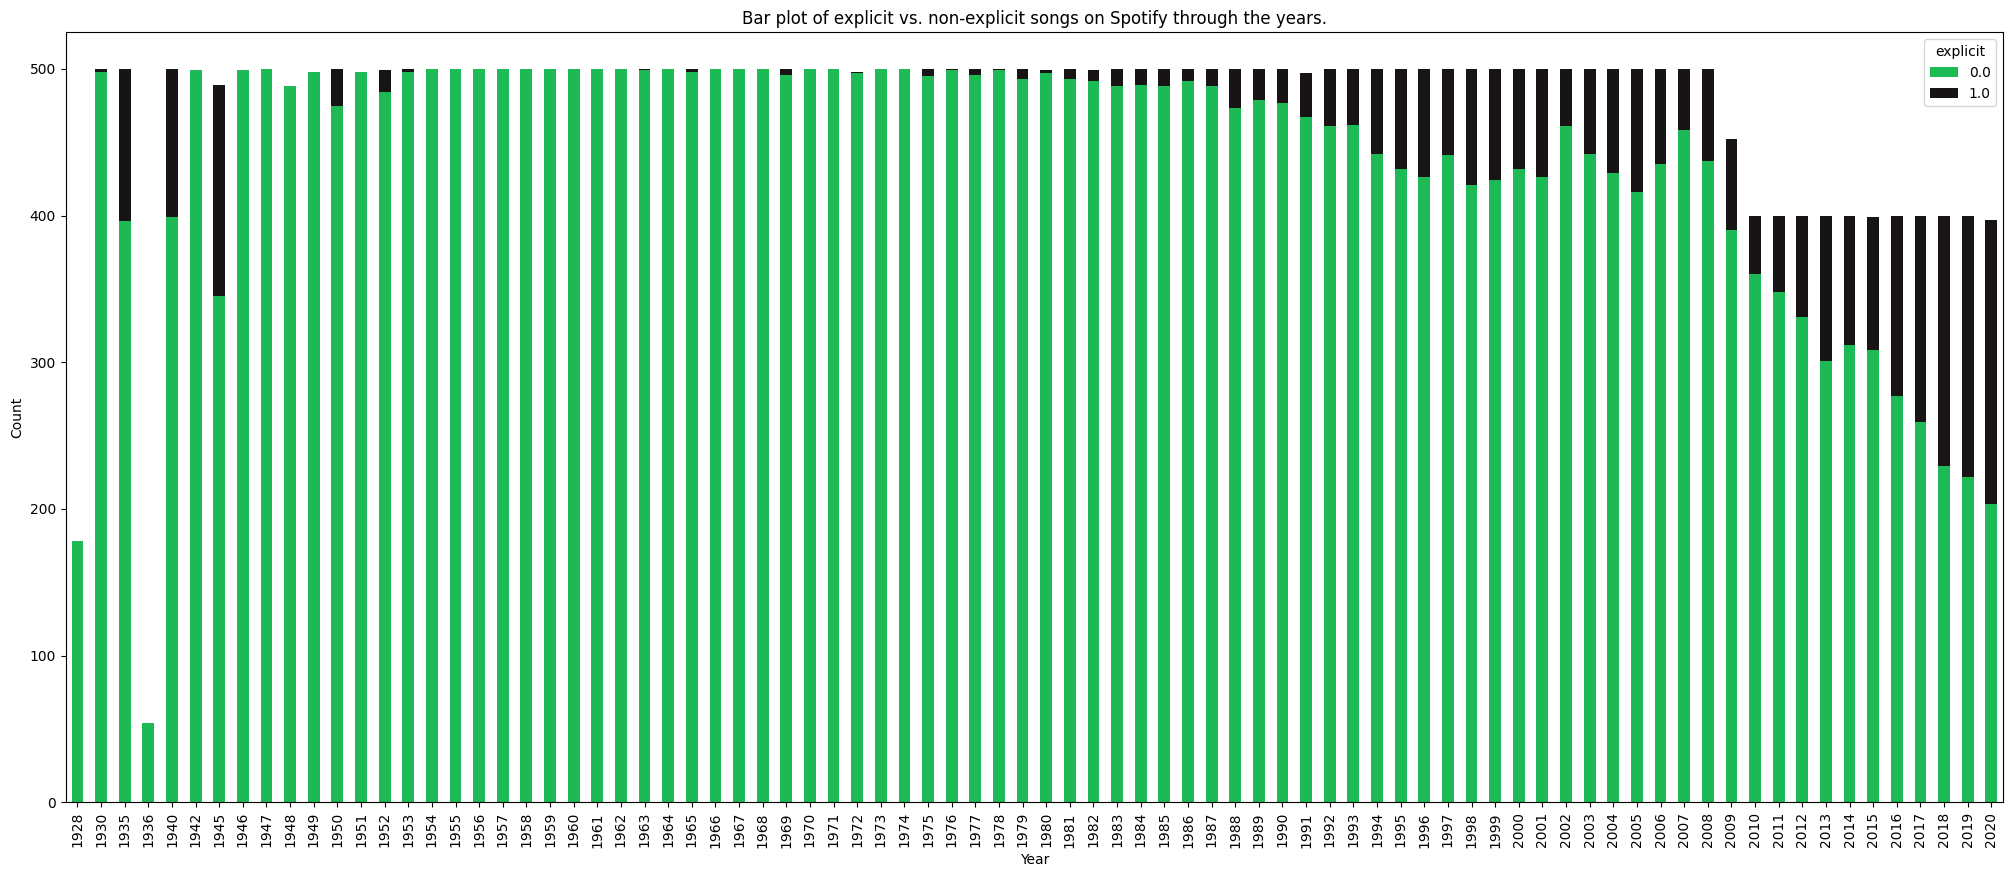

In [17]:
main_df.groupby(["year", "explicit"]).size().unstack().plot(kind="bar", stacked="True", figsize=(25,10), color=["#1db954", "#191414"])
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Bar plot of explicit vs. non-explicit songs on Spotify through the years.")

In [18]:
pd.set_option('display.max_columns', None) # Jupyter display setting
pd.set_option('display.expand_frame_repr', False) # Jupyter display setting
pd.set_option('max_colwidth', None) # Jupyter display setting
explicits = main_df.groupby("explicit")["year"].value_counts() # Get the count between explicit and non-explicit songs by year
pd.DataFrame([explicits[0], explicits[1]], index=["not explicit", "explicit"]) # Convert to DataFrame

year,1966,1955,1971,1970,1968,1967,1974,1964,1962,1961,1960,1959,1958,1957,1973,1956,1954,1947,1942,1978,1963,1946,1976,1949,1953,1965,1951,1930,1980,1972,1977,1969,1975,1981,1979,1982,1986,1984,1987,1948,1983,1985,1952,1989,1990,1950,1988,1991,1993,2002,1992,2007,2003,1994,1997,2008,2006,1995,2000,2004,1996,2001,1999,1998,2005,1940,1935,2009,2010,2011,1945,2012,2014,2015,2013,2016,2017,2018,2019,2020,1928,1936
not explicit,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,499.0,499.0,499.0,499.0,499.0,498.0,498.0,498.0,498.0,498.0,497.0,497.0,496.0,496.0,495.0,493.0,493.0,492.0,492.0,489.0,488.0,488.0,488.0,488.0,484.0,479.0,477.0,475.0,473.0,467.0,462.0,461.0,461.0,458.0,442.0,442.0,441.0,437.0,435.0,432.0,432.0,429.0,426.0,426.0,424.0,421.0,416.0,399.0,396.0,390.0,360.0,348.0,345.0,331.0,312.0,308.0,301.0,277.0,259.0,229.0,222.0,203.0,178.0,54.0
explicit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,2.0,2.0,NaN,2.0,2.0,1.0,4.0,4.0,5.0,7.0,7.0,7.0,8.0,11.0,12.0,NaN,12.0,12.0,15.0,21.0,23.0,25.0,27.0,30.0,38.0,39.0,39.0,42.0,58.0,58.0,59.0,63.0,65.0,68.0,68.0,71.0,74.0,74.0,76.0,79.0,84.0,101.0,104.0,62.0,40.0,52.0,144.0,69.0,88.0,91.0,99.0,123.0,141.0,171.0,178.0,194.0,NaN,NaN


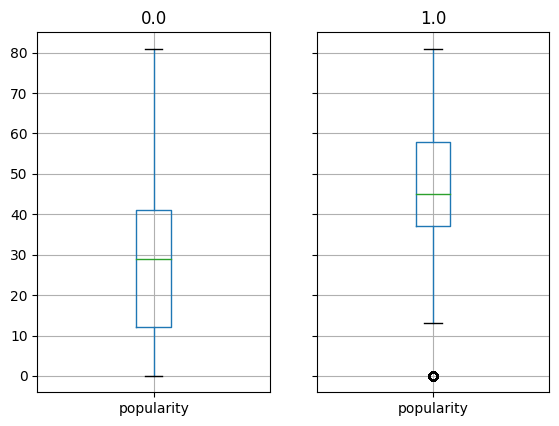

In [19]:
main_df.groupby("explicit").boxplot(column="popularity")
plt.show()

In [20]:
main_df.groupby("explicit").agg({"popularity": ["mean", "median", "std", len]})

popularity                         
               mean median        std    len
explicit                                    
0.0       27.249023   29.0  18.241495  36089
1.0       42.753893   45.0  19.825245   2954

In [21]:
46.726749 - 30.149842

16.576907

In [22]:
ttest_ind(main_df[main_df["explicit"] == 0]["popularity"], main_df[main_df["explicit"] == 1]["popularity"], equal_var=False)

TtestResult(statistic=-41.10602469257166, pvalue=7.956277383795618e-300, df=3375.127331138186)

In [24]:
emotions_df = main_df.groupby(["mode", "key"]).agg("mean")
emotions_df

TypeError: Could not convert Humoreske, Op. 20: IntermezzoKiembeliMy Funny ValentineCholita Paceña (Cueca)Ki An MetaniosoumeHaydn: String Quartet No. 62 in C Major, Op. 76 No. 3, Hob. III, 77, "Emperor": IV. Finale (Presto)Esqueci De SorrirSymphony No. 5 in C Minor, Op. 67: I. Allegro con brioSymphony No. 3 in E-Flat Major, Op. 55 "Eroica": II. Marcia funebre (Adagio assai)Kapote klapsame kai oi dioDeko Na Amare Deko NaI Found a New BabySperanza - Instrument and base VersionPullecenella3 Preludes (Remastered): I. Allegro ben ritmato e decisoMuchachita'A sunnambula - Instrument and base VersionSperanza - Musical base VersionЧасть 104.3 & Часть 105.1 - Триумфальная аркаTujhe Aana PadegaMaya Nagar Byopar MeraPreeti Kisi Ko Na ChhodeSong without Words in G Minor, Op. 102 No. 4Koyeliya Bole Jiya Mora DoleOedipus Rex - Actus secundus: Et maintenant, vous allez entendreAai Nazar Andhere MeinLelo Roop JawaniEbony Concerto: II. AndanteFanfare for a New TheatreManam NinainthengineneLa Bohème: Act II - Oh! Essa! Musetta!Jahan Koi Na Ho Wahan Chalenge HamPake Nazron Ka IsharaMukhre peh sehra dale aajao ane waleKapitel 19 - Der KammersängerSti RoumeliH Xriso den efanikeLearnin' the BluesTry A Little TendernessChristmas In The Air! - Interlude #4Rakhe Teva RahiyePrelude in G Minor, Op. 27, No. 1: Patetico - RemasteredGahtzehk-Tehcehk (Armenia)Oh giusto cielo!Die Walkure : Aus Dem Wald Trieb Es Mich FortClavel GaditanoHwanthe Do Min No AthoFuturityEin Heldenleben, Op. 40: The Hero's BattlefieldStrike Up The BandSerenade In BlueSkin DeepIn The BasementGershwin Medley - RVG RemasterConfirmationMad About The Boy'Round MidnightI Know Why (And So Do You)Fantasy in C minor, BWV 919Straight, No Chaser (Take 3)If I Knew Then (What I Know Now)Almost Like Being In LovePassions of a ManSweet & PungentIf I'm LuckyThe Moon Her Majesty (with Steve Allen)Makin' Whoopee - RemasteredPolly - aka Grace Valse, Haupe, Low Key Lightly, Midnight IndigoSummertimeBrief and BreezyMontgomeryland FunkFascinating RhythmLa BoaWork SongGood Morning BluesBilly's BluesSweet SubstitutePfrancing - Mono VersionBetween The Devil And The Deep Blue SeaIndescreetLove Thy NeighborPrelude and Fugue No. 2 in C Minor, BWV 847: FugueChantBeast Of BurdenSmile - LiveThe Drum ThingMy Melancholy BabyThe Side of a HillMexican HighwayCheesecakeGoldfishMasters of War - Live at Town Hall, New York, NY - April 1963So You Want to Write a Fugue? - For 4 Voices and String Quaret - RemasteredHarry Rag - Mono MixThe World Keep on TurningJuba Juba - RemasteredI Can't Stand It - Live at The Woodstock Music & Art Fair, August 18, 1969DésormaisDeus É O Amor19211776: He Plays the ViolinWhere I Like To StandI've Been Working - 1999 RemasterSigned, Sealed, Delivered (I'm Yours)Vigilante ManIcarusBluebird - Remastered 2010Méditation Des EnfantsLet Me Have It AllStrange Thing Mystifying - From "Jesus Christ Superstar" SoundtrackHave Mercy On The CriminalCan't Strain My BrainWater BabiesLiving in Confusion - RemasteredThe Cask Of Amontillado - 1987 RemixSeven Minutes Of FunkDr. LoveShowroom Dummies - 2009 RemasterMagnificent Sanctuary Band - Bonus TrackHairChange - 2005 Digital RemasterMake Me a MemoryYoung TurksWind Him UpAbacab - LiveI'll Be There Where The Heart IsWesternA DreamLo Pasado No PerdonaI'm Free (Heaven Helps the Man) - From "Footloose" SoundtrackCry Me A RiverCelebrate YouthConciencia Contrareloj曾經心痛Great Train RobberyAtrevidaSpark in the DarkLove Power (with Jeffrey Osborne)Hush Darling - 1990 Digital RemasterDon, AmanDon't Leave Me This Way - Extended VersionNow That We Found Love - Club VersionBohemian Rhapsody - Live at Wembley '86New York Minute - Live On MTV, 1994Cantaloupe IslandChill Out (Things Gonna Change)A String of PearlsFo-Fi-FoA Common DisasterThe Child Is GoneNow That We're DoneOne Step Ahead - Mono MixAfro - Freestyle SkitThe Second Waltz, Op. 99aOrgullecidaMr. Bojangles - Alternate Take - 1970Under a Violet MoonRight on the Tip of My TongueI Can't Go for That (No Can Do) - RemasteredGet AwayLiquid DreamsBe With YouDie Another DayTautouThe PeacocksI'd Rather Dance With YouOne EveningUhn Tiss Uhn Tiss Uhn TissSquare OneStupid MFHip Hop Is DeadLa MarSeventeen ForeverPorcelainSoon We'll Be FoundTHE ART OF DYINGLa La LaBohemian RhapsodyT.G.I.F.El CampaneroOddly RacistHoy Te Vi PasarStrength of a Thousand MenMrs. RightLet's Do It AgainFt.Bennington (2007)Bitter EndMi ObsesiónOutsideDark Angel (feat. Kevin Gates)As I Was SayingThe DepartureMasterpieceFever To The FormI Wish (feat. T.I.)TraphouseJust GoldNorrskenHometownScuse MeSpirit Body Rain FallI <3 My ChoppaSee Me Fall - Y2K RemixsuccessfulSymphony (feat. Zara Larsson)7 Am FreestylePouring Rain - Striking ThunderBig Boy Diamonds (feat. Kodak Black & London on Da Track)Copy Cat (feat. Tierra Whack)19853amLOYAL (feat. Drake and Bad Bunny) - RemixJealousSon Grupos - RemasterizadoΝτούρου ντούρουΖεϊμπέκικοDon't Know If I'm Comin' or Goin' - Take 2Wagner: Die Meistersinger von Nürnberg, WWV 96, Act 3: "Grüss Gott, mein Junker" (Sachs, Walther)Часть 7.3 - По ком звонит колоколL'hai voluto tuSimmo 'e napule paisà - Instrument and base VersionЧасть 231.3 - Триумфальная аркаЧасть 226.5 & Часть 227.1 - Триумфальная аркаString Quartet No. 12 in E-Flat Major, Op. 127: I. Maestoso - Allegro (Live)Pade Ishq MeinI Gotta Right to Sing the Blues - RemasteredAaj Sakhi Ursagar AareFour Russian Songs for Voice, Flute, Harp and Guitar: I. The DrakeKare Badar Baras Baras Kar JayeLe sacre du printemps (1947 version): Pt. 1 "Adoration of the Earth", Games of the Rival ClansNice Work If You Can Get ItThe BirdΠότε θα' ρθειςThe OutcomeLa Wally, Drama lirica in quattro atti / Act 3: "Nè mai dunque avrò pace?"Steile me manoula sto pigadiHusn-Bahar Wai WaiB.G. Bigelow, Inc.Piano Concerto No. 22 in E-Flat Major, K. 482: II. AndanteSinfonia concertante in E-Flat Major, K. 364: II. AndanteMeri Zindagi Mein Tum Kyun AayeTheena Moona KaanaI Puritani (1997 - Remaster), Act II: Riccardo! Riccardo!Don Quixote, Op. 35 - Fantastic Variations on a Theme of Knightly Character: Variation IX (The Combat with the Two Magicians)Lehár: Das Land des Lächelns, Act 2: "Die Herrin darf dem Palast nicht verlassen … Ihr Götter sagt, was ist mit mir gescheh'n?" (Sou-Chong)Alexander Nevsky, Op. 78: Field of the DeadLost in LovelinessLove Me Or Leave Me - From the film, "Love Me or Leave Me"Sometimes I'm HappyIt's All Right with Me - Original Edited Concert - Live at Sunset School, Carmel-by-the-Sea, CA, September 1955The Very Thought Of YouTeoAlmost Like Being In LoveBlues For The Oldest ProfessionThe Serpent's Tooth - Take 1A Flat MinorJust One Of Those Things - InstrumentalWalkin' (Down) - InstrumentalLate ShowDon't Ever Say GoodbyeFalling In Love With LoveTrio in E-Flat Major, D. 929: II. Andante con motoYeh Raat Bheegi BheegiGypsy Airs for Violin and Orchestra, Op. 20Sid's Ahead - Mono VersionEsclavo y Amo - RemasterizadoMove It On OverHey ThereSymphony No. 5 in C Minor, Op. 67: I. Allegro con brioWhat A Little Moonlight Can DoToo Darn Hot - Live In Berlin/1960Les oubliettesNobody but You - Bonus TrackAll Or Nothing At AllEmpty Pockets - Alternate Take / Remastered 2007 / Rudy Van Gelder EditionS.O.S. - Live / Take 3GoodbyeFly Me To The MoonPiano Concerto No. 2 in C Minor, Op. 18: I. ModeratoSummer NightChocolate ShakeSymphony No. 3 in F Major, Op. 90: 3. Poco allegrettoCome Rain Or Come ShineQuiet Nights Of Quiet StarsFrightened TownWhisper NotSymphony No. 3 in E-Flat Major, Op. 55 "Eroica": II. Marcia funebre. Adagio assaiI Want A Chance For RomanceMoney (That's What I Want)Coração VagabundoNine Hundred MilesFixing A HoleChain of Fools - MonoEbo Lala with Seifu YohannesHate To See You GoFive per Cent for Nothing - 2008 Remaster VersioinInfinityBiding My TimeNobodyFantasia on GreensleevesPrison SongFeliciaTwo Cents WorthC'mon And Love Me - LiveHeaven TonightUniversal TribulationBreakfast In America - RemasteredSpookyThe Barber and His WifeHappinessThe Equaliser - RemasteredToda la Noche Oliendo a TiImaginary PlaymatesI Let The Music SpeakNumbersAmerican HeartbeatCan't Stop Lovin' YouBewitched (Are You Leaving Soon)I Am A Baby (In My Universe)We're Comin' OutIn the Sea of CorruptionReal LoveThe Gremlin Rag - Full VersionStick 'EmOnly LonelyLady (You Bring Me Up)Have You Got A Story For Me? - Out Of Africa/Soundtrack VersionTV CasualtyUnicron MedleySheeta's DecisionStanding In MotionFish On The Sand - 2004 MixTurningBewitchedVen Con el Alma DesnudaDançando LambadaPiano Trio No. 2 In E Flat Major, Op. 100, D. 929: II. Andante Con MotoMidnight BluesBaby Don't CryYou Are The Living Word (Live)Two Can Play That Game - K Klassic Radio MixMeth Vs. ChefHigh Hopes - LiveMe Niegas Tanto AmorAin't That A BitchQuizas Si Quizas No - Version IODAEse Hombre Soy YoCuando Volveras (English Version) [Bonus Track]Shock the MonkeyMi ObsesiónAin't It FunnyTu AdiósTe Extraño TantoWhat's Forever For?Cumbia De La RazaThe New YearTour de France - 2009 RemasterStella By StarlightPassing ByScandalous - U.S. Radio EditSorryTheres No Sympathy for the DeadDaylight DiesHistorias De Danzón Y De ArrabalGhost ManVen tuLookin Boy (feat. Yung Joc) - Main Version - ExplicitAll Up 2 You (feat. Akon, Wisin & Yandel)Symphony No. 3 in F Major, Op. 90: III. Poco allegrettoAwaken (feat. Jack Liebeck)Te Perdiste Mi Amor (feat. Prince Royce)What You NeedBroken GlassOpen LetterRefillIn Due TimeCruise - RemixThis Is The Last TimeDualityIt Will Come BackEmpireMoving SilenceEl PerdedorReady for the Times to Get BetterIn Your EyesMerica (feat. Earl Dibbles Jr.)Rain Sound : MonsunNo Te HagasFirst TimeWaterif i could i would feel nothingSunburnLuv BugPads of RedemptionNapkinsShhhh Baby Shusher For SleepMe Niego (feat. Ozuna & Wisin)Mount EverestWhere's My LoveUse This GospelReturningVelvet!LOYAL (feat. Drake and Bad Bunny) - RemixSavage Love (Laxed - Siren Beat)SexBeatKhairiyat (From "Chhichhore")Laxed – Siren BeatBeethoven: Piano Concerto No. 3 in C Minor, Op. 37: III. Rondo. AllegroΗ ψευτομηχανήLamentoDecime Que Si - RemasterizadoJakhan Robona Aami (From "Parichaya")SotixrainasSpiri piperi espernaHua Kya Qusoor Jo Hamse DoorO vesuvio - Instrument and base VersionЧасть 137.3 - Триумфальная аркаBekason Ki Bekasi KoЧасть 5.4 & Часть 6.1 - Триумфальная аркаЧасть 153.2 - Триумфальная аркаLargo in C Minor (Take 2) [Arr. for Violin & Piano]Mazurkas, Op. 30: No. 1 in C MinorOedipus Rex / Actus primus: Invidia fortunam oditSymphony No. 3 in F Op. 90: III Poco allegrettoSonata No. 7, Op. 30, No. 2 in C Minor: Finale: Allegro; PrestoLe sacre du printemps (The Rite of Spring): Seconde partie: Le sacrifice (Part II: The Sacrifice): IntroductionThe Rite of Spring: Part II, The Sacrifice - Ritual Action of the AncestorsKali Ghatayen HainBallet Music from Faust: III. Ancient Dance (Allegretto)Kapitel 12 - Der KammersängerMast Pawan Hai Chanchal DharaKapitel 18 - Der KammersängerElla LouiseEnigma Variations, Op. 36: Variation 13: Romanza ***PilioreitikosGentlemen Prefer Blondes: Mamie is MimiDrowsy Maggie / Scottish Mary / Flogging Reel (medley)O Bhool JanewaleAll the Pretty Little HorsesLove SongEk Sitara Hai Akash MeinPankaritaWoh Aaye Baharein LayeFlat TireSymphony No. 5 in C Minor, Op. 67: I. Allegro con brioCarry Me Back to Old ManhattanKindertotenlieder: Nun seh ich wohl, warum so dunkle FlammenDon Quixote, Op. 35 - Fantastic Variations on a Theme of Knightly Character: Variation IV (The Adventure with the Penitents)N Paha YiItalienisches Liederbuch, nach Paul Heyse: Du denkst mit einem FädchenLullaby of Broadway (with Harry James & His Orchestra)Love Me Or Leave MeSanta AnitaEasy RiderJump Back, Honey, Jump BackMy ManViolin Concerto in D Major, Op. 35: II. Canzonetta - AndanteFour Beat MamboHarlequinOblivionThou SwellEv'ry Time We Say GoodbyeWrap Your Troubles In Dreams (And Dream Your Troubles Away) (with Paul Weston & His Music From Hollywood)She RoteBlue SteelJump For JoyAutumn Leaves - Album Version - (take 2 bonus track)Mambo RicciLike Someone In LovePoor Little FoolDoin' The Thing - Live At Village Gate Club, New York, 1961 / Remastered 2006 / Rudy Van Gelder EditionTeo - Mono VersionReunion BluesFantasia & Fugue in G Minor, BWV 542 "Great": FantasiaMother Goose Village and LemonadeI'm Gonna Sit Right Down And Write Myself A LetterWithout the One You LoveBig NickStrange Love - Single VersionWalkin'La belle putainTangerineLearnin' The BluesNot YetLawiswis Kawayan紅薔薇Winken, Blinken And Nod嘆煙花舊地重遊I Died InsideI Wish You LoveJust You Wait (reprise)* - VoiceMeditationWhere Did You GoThis Little Light of Mine / Which Side Are You On? / Freedom Now Chant / Come by Here (Medley)Little Child (Daddy Dear)Little Ole Boy, Little Ole GirlAnd I Love HimVariations in E-Flat Major, Op. 44: Var. 6Good Humor ManFried Neck Bones and Some Home FriesJessicaHistoria de AmorLove LandCrimson & CloverBelly Button WindowI'm Not Awake YetDon't You CareLast Tango in Paris - Ultimo Tango a Parigi (Titles)Then We Are Decided - From "Jesus Christ Superstar" SoundtrackEnvy No GoodSabbat, pt. 2Rhayader Goes To TownDetroit Rock City - 2012 RemixThe Tell-Tale Heart - 1987 RemixHey, Uh, What You Say Come OnRockmakerLife for the TakingGypsy Songs, Op. 55, B. 104: No. 4, Songs My Mother Taught Me (Arr. F. Kreisler for Cello & Piano)Breakfast In America - Live At Wembley/1979Ancient Airs And Dances, Suite No.3, P. 172: 3. SicilianaCool BreezeGive It UpCoffin For Head of State (Part 1 & 2)Senses - 2015 RemasterWe Will Meet Again - RemasteredPrologue: Jellicle Songs For Jellicle Cats86'd (Good As Gone)Right BrigadeBilly's Got A GunWe Will NotCrystalHuman RaceTomorrow Started - 1997 RemasterEast River DriveSweetest ChillWandering Child / Bravo, MonsieurWaters of MarchI Can Make It BetterValse De Bamboula'Tis AutumnWho's That Lady - RemasteredGlory To Glory To GloryHere's To LifeHistoria de un AmorTime (Clock Of The Heart)Emergency on Planet Earth - RemasteredQue VuelvaThere Will Never Be Another YouCrosstown TrafficCan't Hide Love - LiveLa Vida Es Un CarnavalXplosion (with B-Real)Y Te Lo PidoYamsYou Think I Ain't Worth A Dollar, But I Feel Like A Millionaire - With Out InterludeEv'rybody Wants to Be a Cat - From "The Aristocats"/Soundtrack VersionRide Like the WindOh GirlHere We AreDeath of a MartianApparitionWork MeIn Fate's HandsThe City Is at WarSe Acabo El AmorShe's In LoveLady (You Bring Me Up)Quítame Ese Hombre Del Corazón - Norteña VersionAn Evening WalkDon't GoThe DreamAnalog (Featuring Hodgy Beats)Letter HomeRound And RoundWhere Have You BeenRock N RollSmokin' And Ridin' (feat. Freddie Gibbs & Problem)Wish I Had ItDon't Think They Know (feat. Aaliyah)WindfallBreak the RulesNew AmericanaDefineAscendLeft Behind (Sister Location Song)Tity and Dolla (feat. Hugh Augustine & Jay Rock)Savage ModeLight of the SevenI Just Wanna KnowSomeone In The CrowdFXXK ITTerrifiedBeautiful Creatures (feat. MAX)Yer Killin' MeOceanic CalmnessReal FriendsClimax (feat. 6lack)Nicotine PatchesForever EverRebota - RemixPoofHBSTreat You BetterMad At Me.i want war (BUT I NEED PEACE)The Giddybug Gallop - Remastered - 1995Non piangeròY de ahiKahe Paap Se Paap Chhipaye ReЧасть 58.4 & Часть 59.1 - Триумфальная аркаSancho - gubernatorConcerto No.. 2 in C Minor, Op.18: Moderato; AllegroLargo in C Minor (Take 1) [Arr. for Violin & Piano]Часть 20.3 - Триумфальная аркаЧасть 225.3 - Триумфальная аркаNacho Chhananan ChhamBehind The Eight BeatЧасть 135.3 & Часть 136.1 - Триумфальная аркаMain Jab Chhedoon Prem TaranaI. Allegro con brio from Sonata No. 7 in C minor for Violin and Piano, Op. 30, No. 2Papa, Won't You Dance with Me?These Foolish ThingsPalash Manjari ParayeStravinsky: Le sacre du printemps (The Rite of Spring): Le sacre du printemps: The Adoration of the Earth: IntroductionNeer Bhare More Nain SajanwaSonata No. 7, Op. 30, No. 2 in C Minor: Allegro con brioSomebody Loves Me (From George White's Scandals)Sun Bairi Balam Sach Bol ReMousolini Allakse GnomiFolk Song from West Bengalkoritsia mou SouliotikaString Quartet No. 4 in C Minor, Op. 18: I. Allegro ma non tantoEbony Concerto: II. AndanteViolin Sonata No. 7 in C Minor, Op. 30 No. 2: IV. Finale - AllegroCozy's BopLes pêcheurs de perles / Act 3: Tableau 2: No.14 Scène et Choeur: "Sombres divinités"Symphony No.100 in G Major, Hob.I:100 - "Military": 4. Finale ( Presto)Guzra Hua Ulfut Ka ZamanaBen RitmatoChto Mnye GoryeWhere or When - Original Edited Concert - Live at Sunset School, Carmel-by-the-Sea, CA, September 1955Puccini: Madama Butterfly, Act 2: "Gllielo dirai?...Premetto" (Kate, Suzuki, Butterfly)Hank's Other Tune (Late Show)The Well-Tempered Clavier, Book 2, BWV 870-893: Fugue No. 7 in E-Flat Major, BWV 876Polso Bylo Lyublyatse (I Never Meant to Love)JoshuaWhen I Was YoungI Remember Clifford - LiveAutumn In New YorkCorazón Sin PuertoThe Golden HornThe Serpent's Tooth - Take 2The Well-Tempered Clavier, Book 1: Prelude No. 2 in C Minor, BWV 847Just One Of Those Things - Live At Mister Kelly's, Chicago/1957Soul JunctionA Cottage For SaleRhythm-a-ningSar Jo Tera ChakrayeAugust BellsI've Told Ev'ry Little StarMy Funny ValentineEpilogueWee Dot - Live At The Half Note, NYC, 1959Shifting DownYa HenayenaMenu Di Ye JeweSomeday My Prince Will ComeImages'S NiceSociety Red - Remastered 2015The Darktown Strutters' BallIf Your Mother Only Knew - Mono VersionSpirit of America (Mono)In The MoodHey ThereDon't Knock The RockMy Funny Valentine - Live At NewportSpirit of America (Stereo)Hares On The MountainOnce Upon A SummertimeA Fat Boy Can CryIron LadyDear Old StockholmContract On LoveC'mon MarianneEl CiegoSymphony No. 5 in C Minor, Op. 67: I. Allegro con brio - Remastered1776: Cool, Cool, Considerate MenThe Voyage1776: Is Anybody There?Fugitive LifeIf You Let MeRainy Days And Mondays - Single VersionDeep In The DarkWith A Child's HeartLa déclaration d'amour - Remasterisé en 2004I'm Still WaitingKiteSince You've AskedQuiero Dormir Cansado - Tema RemasterizadoCoisinha do PaiSweet 'N SavvyOnly A ManNo Te Apartes de Mi (Não Se Afaste de Mim)Para OchúnIn the RawFantasia in C minor, K.475: AndantinoPityBad RiskHeart To HeartNo Tengo Dinero - 1983Layin' It on the Line(Feels Like) Heaven - Extended VersionYou Don't BelieveLet's Talk About MeAdagio For Strings And Organ In G MinorGoodbye Lucille #1 - 2007 Remastered VersionEast St. Louis Toodle-OoThe WayA Sea of Clouds in the MoonlightLove Is Our Cross To BearLove Bites - Radio EditHome AgainMoonlight FlightDancin' Late At NightA World Without YouHare un Altar para TiCielo RojoCordeliaLa Dueña de Mis AmoresDon't Cha KnowUne histoire de plageCoração VagabundoBelieveYou Can Do ItNo InterruptionsThe Last UnicornAll The Places (I Will Kiss You)Let's Go SunningLove Is On The WayDanger of HellCan't Make You Love MeWhyReady for the Good TimesMr. Bojangles - Single VersionHooliganSsj3 Power UpRight and a Wrong Way - 2007 RemasterTruth HurtsSombra LocaFeelin' MyselfGoodbye LoveThe Girl Can’t Help ItLabios CompartidosYou Fight MeA LifetimeRunning Up That HillAfter TonightColt 40ty FivaSlide Through My FingersIMNOTYOURBOYFRIENDBABYAdelante CorazónDress You UpBaby By Me (Featuring Ne-Yo)POWER - Album Version (Edited)National AnthemTime Of Your LifeI Still Can't StopAwakeThe DropThat's What Friends Are For (with Elton John, Gladys Knight & Stevie Wonder)Sound Of ChangeWarriorWasn't That Drunk (feat. Carly Pearce)The Hills - RemixCheer Up, My BrotherFor Everybody (feat. Wiz Khalifa & R. City)WaterQuiero RepetirWinter Blues전야 前夜 The EveAirplane pt.2There You AreWaves (feat. 6LACK)Intermezzosmiling when i dieBetterTaking It OutWithout MeNumbThe Drug In Me Is ReimaginedOtan mou eipes exe geiaDodo RememberHaydn: String Quartet No. 59 in G Minor, Op. 74 No. 3, Hob. III, 74, "The Horseman": IV. Finale (Allegro con brio)De Puro Guapo - RemasterizadoTha paro enan aniforoЧасть 179.4 & Часть 180.1 - По ком звонит колоколParlanno parlanno - Instrument and base VersionAamaar Haate Jey蝴蝶夫人Verdi : La forza del destino : Act 3 "Toh, toh!... Poffare il mondo!" [Melitone, Chorus]Goldberg Variations, BWV 988: Variation XXVVerdi : La forza del destino : Act 3 "Al tradimento... Amici in vita, in morte" [Carlo, Chorus, Alvaro]MaldiçãoMazurka in C Minor, Op. 56, No. 3Divertimento from "Baiser de la fée": 1. SinfoniaLa Traviata: Follie! Follie! Delirio vanoSonata No. 8 in C Minor, Op. 13 "Pathétique": III. Rondo - AllegroAaja Tujhe AfsanaThe Rite of Spring: Part II: Glorification of the Chosen OneAai Sawan Rut AaiAai Gori RadhikaDido and Aeneas (2008 Digital Remaster): Thy hand, Belinda; darkness shades meSacha's MarchPiano Concerto No. 3 in C Minor, Op. 37: I. Allegro con brioShyam Vina Vraj Soonu LageMeu SofrerMou pariggeile to aidoniTu lo sai - VoiceRetintin - Instrumental (Remasterizado)Bengeria - Kipsigis TribePahat Nahin TulaTerry's Success (Child's Theme)Siegfried's Death and Funeral MusicThe Man Who Broke the Bank at Monte CarloWhere the Sun Will Never Go DownCherry PointThe Class War, The Four-Hour DayFairest IsleMeri Achhi Bhabhi NeMessa da Requiem: Dies Irae: Quid sum miserDon't Blame MeMambo at the WaldorfWhen the Red, Red Robin Comes Bob, Bob, Bobbin' Along - Live at Medina TempleTanganyikaNice Work If You Can Get ItA Flat Minor - OuttakesFuiste MalaTime For August - RemasteredMoveYesterdaysCerca Del Río GrandeI've Told Ev'ry Little StarJazz Me BluesPiano Concerto No. 3 in C Minor, Op. 37: I. Allegro con brioPieta'Round Midnight - Mono VersionO Nadire Ekti KathaDown In The DepthsFascination / EcstasyIsn't It A PitySymphony No. 3 in F Major, Op. 90: III. Poco allegrettoSheriString Quartet in G Minor, Op. 10, L. 85: II. Assez vif et bien rythméSlowly He Sank to the Bottom of the SeaInvention No. 2 in C Minor, BWV 773Black DiscipleHello There AngelI Remember SuzanneHelp Me GirlBamboo Flute BluesBusamba打鑼打鼓總有一天等到你Stalia StaliaBy The Time I Get To PhoenixEllie's Love ThemeCleo's ApartmentWe Were All Wounded at Wounded KneeFigure EightTell Her Love Has Felt The NeedAll In Love Is FairRock And Roll RecordsLonesome In My BedroomIn the Winter - RemasteredAdagio in G Minor (Attrib. Albinoni) [Arr. for Chamber Orchestra]Tus OjosTonightA Fifth Of BeethovenTry Me - 2008 RemasterMiaI've Just Begun to Love YouRemember (Walking In The Sand)Te Estoy Queriendo Cada Día MásThe Greatest Love of AllEmergencyWords at Twenty PacesYesterdayRock for LightSwamps Of SadnessRecalling WinterIsn't It Midnight - 2017 RemasterI Don't Want To Be A Hero - 2008 Digital RemasterChega De SaudadeI'll Go On Loving YouThe FogMy WorldLa PlagaPinionFresh TendrilsThe Key To YouWormboyAlmost GoodbyeMind PowerHabana del EsteCan We Still Be Friends?Haircut - From "Mulan"/ScoreEasy LoversPrayer - SkitVain Glory OperaMy Baby YouLa GorraExtraño Mi PuebloBullet RideDime Que QuieresBonafide Love (feat. Wayne Wonder)Sin miedo a nadaTime (Clock Of The Heart) - 2003 MixNext To NothingTres Palabras - Versión TríoThe New YearWalk InLaffy TaffyflowersIt's ChangedLiving In LoveSweet Dreams (Are Made Of This) - Steve Angello Remix EditEnjoy The SilenceSin miedo a nada (feat. Amaia Montero)I KnowSecond ChanceA Brief Walk in the Sea to numeric

In [25]:
confidences = []

for i in range(2): # Loop through each unique value for the mode variable
    mode_df = main_df.query("mode == @i") # Filter df to only contain tracks of the present mode
    for j in range (12): # Loop through each unique value for key variable
        modekey_df = mode_df.query("key == @j") # Filter df to only contain tracks of the present key, partnered with the present mode acquired in the parent loop
        confidences.append(len(modekey_df)/len(mode_df))

emotions_df.insert(loc=0, column="support", value=main_df.groupby(["mode", "key"]).size())
emotions_df.insert(loc=1, column="support_ratio", value=emotions_df["support"]/len(main_df))
emotions_df.insert(loc=2, column="confidence_modekey", value=confidences)
emotions_df

NameError: name 'emotions_df' is not defined

In [26]:
emotions = ["Innocently Sad, Love-Sick", "Despair, Wailing, Weeping", "Serious, Pious, Ruminating", "Deep Distress, Existential Angst", "Effeminate, Amorous, Restless", "Obscure, Plaintive, Funereal", "Gloomy, Passionate Resentment", "Discontent, Uneasiness", "Grumbling, Moaning, Wailing", "Tender, Plaintive, Pious", "Terrible, the Night, Mocking", "Solitary, Melancholic, Patience", "Innocently Happy", "Grief, Depressive", "Triumphant, Victorious War-Cries", "Cruel, Hard, Yet Full of Devotion", "Quarrelsome, Boisterous, Incomplete Pleasure", "Furious, Quick-Tempered, Passing Regret", "Conquering Difficulties, Sighs of Relief", "Serious, Magnificent, Fantasy", "Death, Eternity, Judgement", "Joyful, Pastoral, Declaration of Love", "Joyful, Quaint, Cheerful", "Harsh, Strong, Wild, Rage"]
emotions_df.insert(loc=3, column="emotion", value=emotions)
emotions_df = emotions_df.sort_values("support", ascending=False)
emotions_df

NameError: name 'emotions_df' is not defined